In [1]:
############################################
# LOGISTIC REGRESSION | Binary response
############################################
import pandas as pd 

churn = pd.read_csv("datasets/churn.csv")
display(churn.head(5))


,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


Intercept                   0.490780
time_since_last_purchase    0.063783
dtype: float64


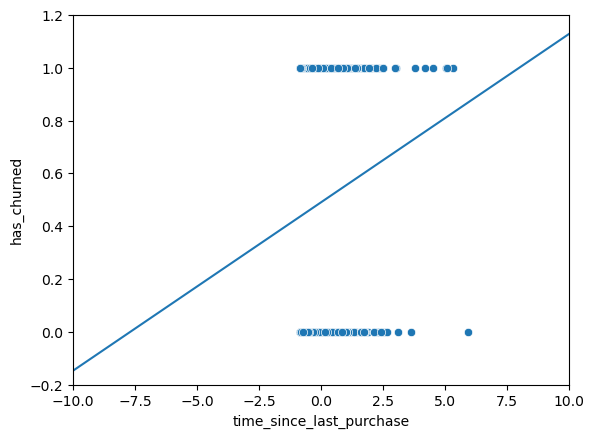

In [9]:
###################
#linear model
#churn vs recency
###################
from statsmodels.formula.api import ols
mdl_churn_vs_recency_lm = ols("has_churned ~ time_since_last_purchase", data=churn).fit()
print(mdl_churn_vs_recency_lm.params)

intercept, slope = mdl_churn_vs_recency_lm.params

import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x="time_since_last_purchase", y="has_churned", data=churn)
plt.axline(xy1=(0, intercept), slope=slope)
#zooming out
plt.xlim(-10,10)
plt.ylim(-0.2,1.2)
plt.show()
#the model predicts negative probabilities in the bottom-left of the plot
#and probabilities greater than one int the top-right 


Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64


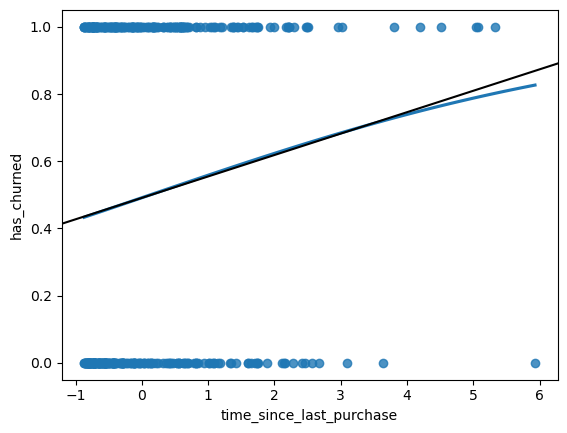

In [13]:
###################
#logistic model
#churn vs recency
###################
from statsmodels.formula.api import logit
mdl_churn_vs_recency_lm = logit("has_churned ~ time_since_last_purchase", data=churn).fit()
print(mdl_churn_vs_recency_lm.params)

sns.regplot(x="time_since_last_purchase", y="has_churned", data=churn, ci=None, logistic=True)
plt.axline(xy1=(0, intercept), slope=slope, color="black")
plt.show()

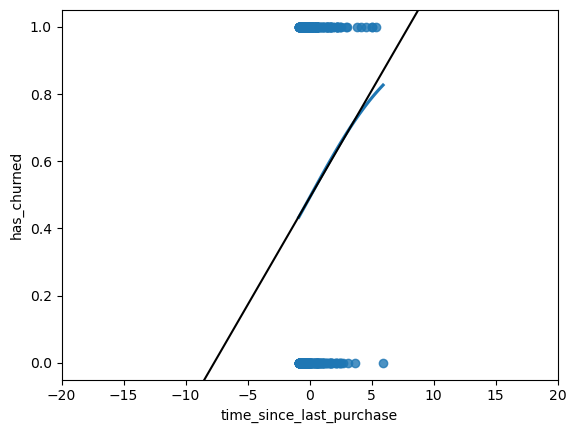

In [15]:
#zooming out

sns.regplot(x="time_since_last_purchase", y="has_churned", data=churn, ci=None, logistic=True)
plt.axline(xy1=(0, intercept), slope=slope, color="black")

plt.xlim(-20,20)

plt.show()

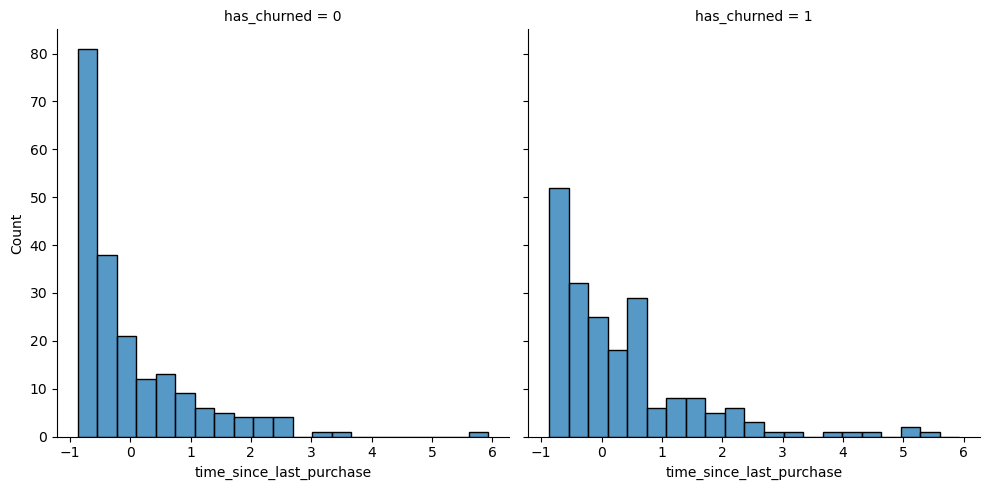

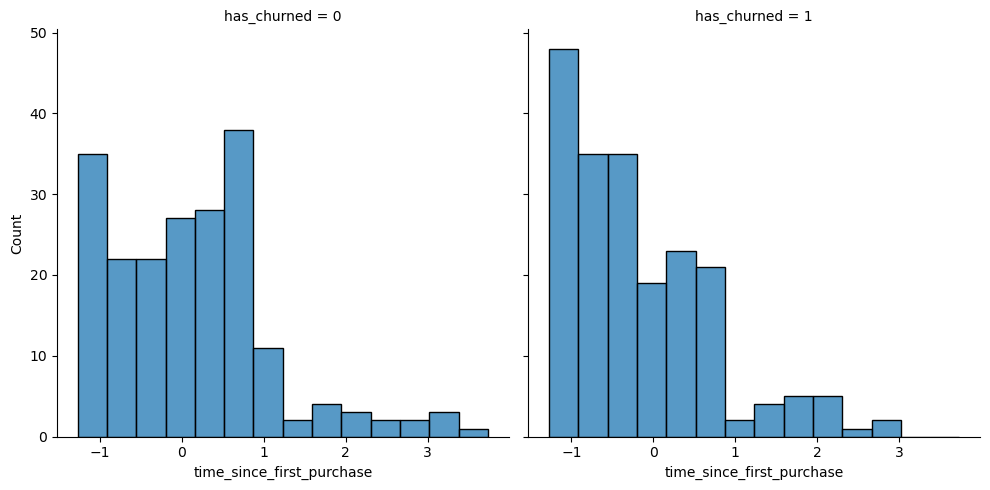

In [17]:
#######################################
#Exploring the explanatory variables
#######################################
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data=churn, x="time_since_last_purchase", col="has_churned")
plt.show()
#the distribution of churned customers was further right than the distribution of non-churned customers 
#churners typically have longer times since their last purchase

# Redraw the plot with time_since_first_purchase
sns.displot(data=churn, x="time_since_first_purchase", col="has_churned")
plt.show()
#the opposite is true: churners have a shorter length of relationship.

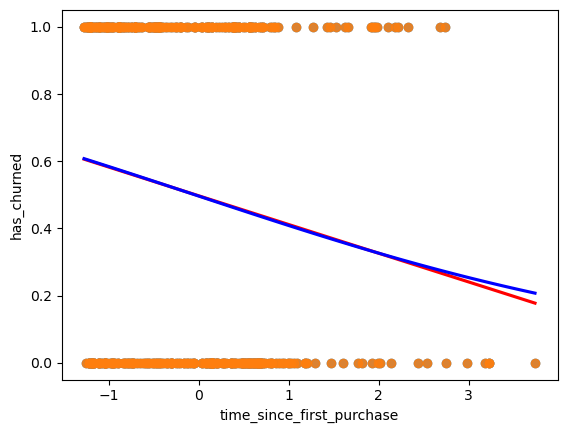

In [18]:
#######################################
#Visualizing linear and logistic models
#######################################
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            logistic=True,
            line_kws={"color": "blue"})

plt.show()

#The two models give similar predictions in some places, 
#but there is a slight curve in the logistic model trend.


In [19]:
#######################################
#Logistic regression with logit()
#######################################
#model how the length of relationship with a customer affects churn.
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

#The code to run a logistic regression is a simple change from the code to run a linear regression. 
#Now let's make some predictions with the model.


Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


In [27]:
########################
#Making prediction
########################
import numpy as np
mdl_recency = logit("has_churned ~ time_since_last_purchase", data=churn).fit()

explanatory_data = pd.DataFrame({"time_since_last_purchase": np.arange(-1, 6.25, 0.25)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_recency.predict(explanatory_data)
)

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


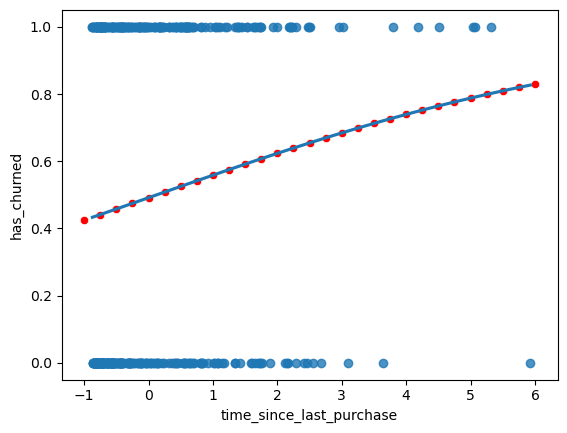

In [28]:
##########################
#Adding point predictions
##########################
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            logistic=True)

sns.scatterplot(x="time_since_last_purchase",
            y="has_churned",
            data=prediction_data,
            color="red")
plt.show()

#As expected, these points follow the trend line.

#The probability of a positive response is a natural way of thinking about predictions.


   time_since_last_purchase  has_churned  most_likely_outcome
0                     -1.00     0.424523                  0.0
1                     -0.75     0.441043                  0.0
2                     -0.50     0.457695                  0.0
3                     -0.25     0.474441                  0.0
4                      0.00     0.491246                  0.0


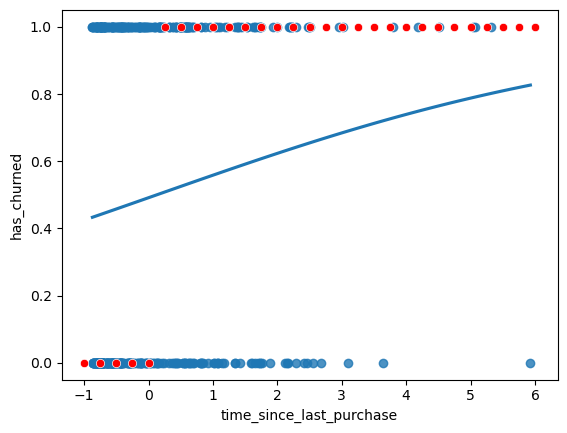

In [30]:
###############################
#Getting the most likely outcome
###############################

#for non technical audience
#rather than saying there is a 60% chance of a customer churning, 
#you say that the most likely outcome is that the customer will churn.

# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_last_purchase",
            y="most_likely_outcome",
            data=prediction_data,
            color="red")

plt.show()

#Providing the most likely response is a great way to share the model results with a non-technical audience.


   time_since_last_purchase  has_churned  most_likely_outcome  odds_ratio
0                     -1.00     0.424523                  0.0    0.737688
1                     -0.75     0.441043                  0.0    0.789046
2                     -0.50     0.457695                  0.0    0.843980
3                     -0.25     0.474441                  0.0    0.902738
4                      0.00     0.491246                  0.0    0.965587


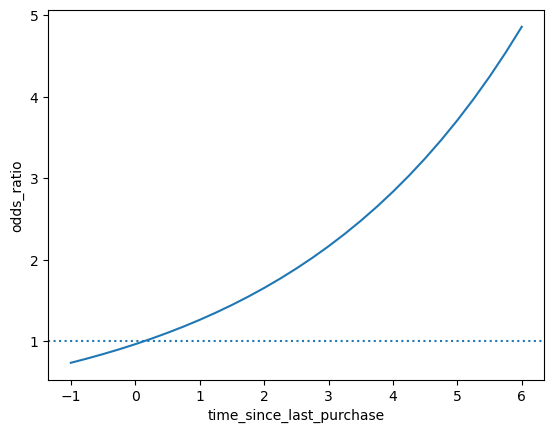

In [32]:
#############################################
#Odds ratio
#another way of expressing prediction
#############################################
#Odds ratios compare the probability of something happening with the probability of it not happening
#if a customer has a 20% chance of churning, 
#it may be more intuitive to say 
#"the chance of them not churning is four times higher than the chance of them churning".
#This is sometimes easier to reason about rather than probabilities

# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1-prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

# Create a line plot of odds_ratio vs time_since_last_purchase
sns.lineplot(x="time_since_last_purchase",
            y="odds_ratio",
            data=prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

#Odds ratios provide an alternative to probabilities 
#that make it easier to compare positive and negative responses.


   time_since_last_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                     -1.00     0.424523                  0.0    0.737688   
1                     -0.75     0.441043                  0.0    0.789046   
2                     -0.50     0.457695                  0.0    0.843980   
3                     -0.25     0.474441                  0.0    0.902738   
4                      0.00     0.491246                  0.0    0.965587   

   log_odds_ratio  
0       -0.304234  
1       -0.236931  
2       -0.169627  
3       -0.102323  
4       -0.035019  


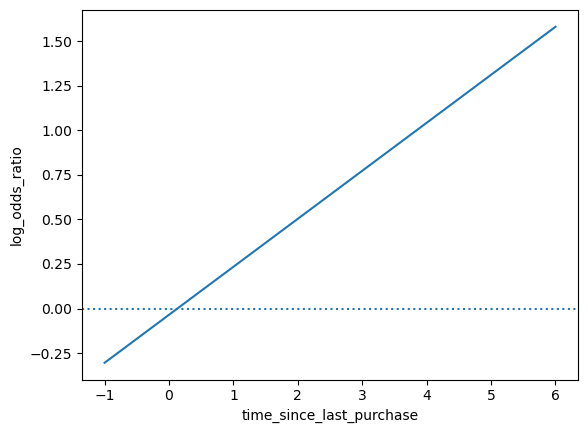

In [33]:
###############
#log odds ratio
###############
#One downside to probabilities and odds ratios for logistic regression predictions 
#is that the prediction lines for each are curved.
#This makes it harder to reason about what happens to the prediction 
#when you make a change to the explanatory variable.
#The logarithm of the odds ratio (the "log odds ratio" or "logit") 
#does have a linear relationship between predicted response and explanatory variable

#Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, 
#for visualization purposes it's usually better to plot the odds ratio 
#and apply a log transformation to the y-axis scale.

# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

# Print the head
print(prediction_data.head())

# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_last_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

#the linear relationship between predicted log odds ratio and the explanatory variable 
#makes changes easier to reason about.



In [35]:
#####################
#Confusion matrix
#####################

actual_response = churn["has_churned"]
predicted_response = np.round(mdl_recency.predict())
outcomes = pd.DataFrame({"actual_response": actual_response, "predicted_response": predicted_response})
print(outcomes.value_counts(sort=False))


actual_response  predicted_response
0                0.0                   141
                 1.0                    59
1                0.0                   111
                 1.0                    89
dtype: int64


[[141.  59.]
 [111.  89.]]
0.575
0.445
0.705


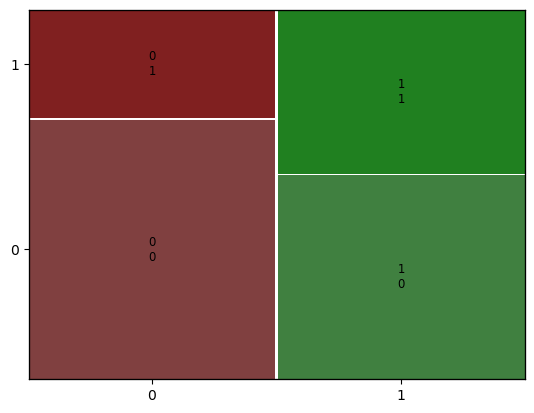

In [41]:
#################################
#Visualizing Confusion matrix
#################################

conf_matrix = mdl_recency.pred_table()
print(conf_matrix)

from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)

accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / (conf_matrix[0,0] + conf_matrix[1,1] 
                                                    + conf_matrix[0,1] +conf_matrix[1,0])
print(accuracy)

sensitivity = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0])
print(sensitivity)

specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])
print(specificity)

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64
[[112.  88.]
 [ 76. 124.]]


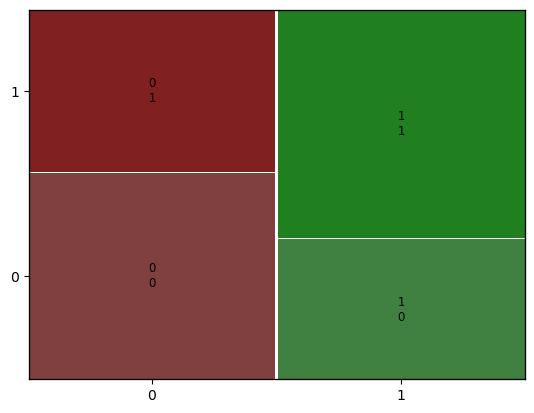

In [43]:
#####################
#Confusion matrix
#with another model
#####################

# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response,
                         "predicted_response": predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

#confusion matrix is just a table of counts

##################################################
#Drawing a mosaic plot of the confusion matrix
##################################################
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

#using the .pred_table() method, getting and plotting the confusion matrix is easy.

In [44]:
#######################################
#Measuring logistic model performance
#######################################
#several metrics exist for measuring the performance of a logistic regression model.

# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN+TP)/(TN+FN+TP+FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP/(TP+FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN/(TN+FP)
print("specificity: ", specificity)

#Using these metrics, it becomes much easier to interpret and compare logistic regression models.

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
